<a id="start"></a>

<span style="padding: 0 05px"></span> [ <font color = "black" size ="3.5" > **Part 3, Section 16** <span style = "padding:0 2px"></span> **Naive Bayes Classification (classification)**](#sec_16) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.1 <span style = "padding:0 12px"></span> import mostly used libraries](#ref_1.1) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.2 <span style = "padding:0 12px"></span> import data frame and have a look on missing values](#ref_1.2) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.3 <span style = "padding:0 12px"></span> Splitting test and training sets](#ref_1.3) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.4 <span style = "padding:0 12px"></span> Splitting into test and training sets](#ref_1.4) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.5 <span style = "padding:0 12px"></span> Naive Bayes classifier (Probability based classifier)](#ref_1.5) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.6 <span style = "padding:0 12px"></span> Performance of Logistic Regression](#ref_1.6) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.7 <span style = "padding:0 12px"></span> Visulation with <code>matplotlib</code](#ref_1.7) </font>   <br/>

### Sec 16. Naive Bayes Classification (classification) <a id="sec_16"></a>

<font color = "Brown" size ="3" >  
**Naive Bayes (classification)**   
</font>
Some nice videos to understand the "Bayes" theorem:
<font color = "Brown" size ="3" >  
    https://www.youtube.com/watch?v=ADaxql883-M  (Conditional Probability) <br>
0):    https://www.youtube.com/watch?v=Fv_LGQKgWi0 <br>
1): https://www.youtube.com/watch?v=ibINrxJLvlM&feature=share <br>
2): https://www.youtube.com/watch?v=H02B3aMNKzE&feature=share <br>
3): https://www.youtube.com/watch?v=SrEmzdOT65s&feature=share <br>
</font>

<font color = "Brown" size ="6" >  
**How it works**  </font>
<font color = "Brown" size ="5" >  
conditional prob of classification = **(  ( likeligood )* (prior probability) )/ (marginal likelihood)** <br>
step-1): First of all, I will calculate the **"Prior probability"**  <br>
step-2): Calculate the **marginal liklihood** <br>
step-3): calculate the likelihood <br>    
</font>


<font color = "blue" size ="3.5" >  
**Calculation-1**  </font> <br>

<font color = "blue" size ="2.5" >  
**Prior probability  (step-1)**  </font> <br>
E.g. there are two 2 classes, so definitely we want to guess whether to put our point either in  class-1 or class-2
<font color = "blue" size ="2" >  
@): Assume that point is actually in class-1, and then calculate the probability of class-1 only <br>
@): i.e. number of elements of class-1/total number of observation (whole sample space) <br>
@): This is called the prior probability of that class only <br>    
</font>


<font color = "blue" size ="2.5" >  
**Marginal liklihood  (step-2)**  </font> <br>
E.g. there are two 2 classes, so definitely we want to guess whether to put our point either in  class-1 or class-2 
<font color = "blue" size ="2" >  
@): I'll insert our data point and make a circle around that, <br>
@): After making the circle, I will that all enclosed data-points behaves as of my inserted new data point <br>
@): So marginal probability = probability of enclosed data-points <br>
@): i.e. number of closed data-points / total number of observations (full sample space) <br>
@): this is called **marginal liklihood**, its very similiar to the "margin values" of conditional probability <br>
</font>


<font color = "blue" size ="2.5" >  
**liklihood  (step-3)**  </font> <br>
<font color = "blue" size ="2" >  
@): I'll take the same circle and enclosed data <br>
@): Now I'll calculate the probability of points belong to class-1 only (class under consideration) and ignore/dim the point of other class/classes. In that circle I mean. <br>
@): which means, I will take the circle, exclude yhe data-point of other class. Count the num. of observation belong to current class and divide it by total number of elements of current class.
<br>
</font>


Then insert into the formula...

***

<font color = "blue" size ="3.5" >  
**Calculation-2**  </font> <br>
<font color = "blue" size ="2" >  
@): Repeat all the same steps for class-2 <br> </font>


***

<font color = "blue" size ="3.5" >  
**Calculation-3**  </font> <br>
<font color = "blue" size ="2" >  
@): Repeat all the same steps for class-3,4,5 <br> </font>

***

and assign to class which has maximum probability, <br>
In case of two classes only, we just meed one prob. calculation only <br>
Second's is just 1 - first's probability <br>

[Back to Top](#start)

#### <font color = "navy" >1.1) import mostly used libraries </font> <a id="ref_1.1"></a>

In [1]:
%reset -f
import pandas as pd
import numpy as np

In [2]:
%ls

Social_Network_Ads.csv    classification_KNN.ipynb


#### <font color = "navy" >1.2) import data frame and have a look on missing values</font> <a id="ref_1.2"></a>

In [3]:
tmp = pd.read_csv("Social_Network_Ads.csv")
tmp.Gender = pd.Categorical(tmp.Gender,["Male","Female"])
tmp.Gender = tmp.Gender.cat.codes
tmp.head(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
5,15728773,0,27,58000,0
6,15598044,1,27,84000,0
7,15694829,1,32,150000,1


In [4]:
# print(tmp.dtypes)

In [5]:
# tmp.Gender = tmp.Gender.cat.codes

<font color = "Brown" size ="4" >  
Indepedent variables=> X  <br/>
dependent => y (in classification, It is representing the Binary situation here) <br>    
</font>

In [6]:
X = tmp.iloc[:,[2,3]].values
y = tmp.Purchased.values

In [7]:
X.shape
y.shape

(400,)

In [8]:
print("X -->: INDEPENDENT type ")
print(np.array_str(X[0:10], precision = 3, suppress_small=True))
print("====================================================")
print("X -->: DEPENDENT, decision")
print(y)

X -->: INDEPENDENT type 
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
X -->: DEPENDENT, decision
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 

In [9]:
# X  # ==> age, salary
# y  # ==> categorical variable (yes/no)

[Back to Top](#start)

#### <font color = "navy" >1.3) Splitting test and training sets </font> <a id="ref_1.3"></a>

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [12]:
print("X_train")
# print(X_train)
print(X_train.shape)
print("=======")
print("X_test")
# print(X_test)
print(X_test.shape)
print("=======")
print("y_train")
# print(y_train)
print(y_train.shape)
print("=======")
print("y_test")
# print(y_test)
print(y_test.shape)

X_train
(300, 2)
X_test
(100, 2)
y_train
(300,)
y_test
(100,)


So based on X_train and y_train, I'll train our ML model and then  <br>
based on this model, I'll predict whether it matches with the test set .. or how close it is:

<font color = "Brown" size ="5" >  
**Adjust feature scalling for Logistic Regression (which is actually a classification)**
</font>

[Back to Top](#start)

#### <font color = "navy" >1.4) Feature scalling</font> <a id="ref_1.4"></a>

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<font color = "Brown" size ="3" >  
In above cell, we basically normalize the X_train and X_test only... <br>
    I think, I don't need to normalize the y_test in this cases, buz its only 0,1 <br>
</font>

[Back to Top](#start)

#### <font color = "navy" >1.5) Naive Bayes classifier (Probability based classifier)</font> <a id="ref_1.5"></a>

- **<font color = 'blue' > traning the model</font>**

In [15]:
from sklearn.naive_bayes import GaussianNB

<font color = "Brown" size ="3" >  
1): Intiution steps are written above <br>   
</font>

In [16]:
# No need to insert any additional argument inside the class
# ==============================================================================
classifier = GaussianNB()

In [17]:
classifier

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# Training this kernel classifier with X_train (our training data) 
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

- **<font color = 'blue' > Get the predictions</font>**

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [21]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [22]:
# X_test[1:10]

[Back to Top](#start)

#### <font color = "navy" >1.6) Performance of Naive Regression</font> <a id="ref_1.6"></a>

- **<font color = 'blue' >Create confusion matrix</font>**

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_pred,y_test)

In [25]:
cm

array([[65,  7],
       [ 3, 25]])

[Back to Top](#start)

#### <font color = "navy" >1.7) <code>contourf(  )</code> method pyplot plotting, for better Visulalization</font> <a id="ref_1.7"></a>

In [26]:
# This code can be use againt anad again, so give a separate name
# ==============================================================
X_set , y_set = X_train, y_train

In [27]:
# Preparation for grid mesh
# ===========================
print(f"X_min ==> {X_set.min()-1}")
print(f"X_min ==> {X_set.min()-1}")

X_min ==> -2.9931891594584856
X_min ==> -2.9931891594584856


In [28]:
# Define range baed on X_min, and X_max
# ======================================
x_axis_range = y_axis_range = np.arange(start = X_set.min()-1, stop =   X_set.max()+1, step = 0.01)

# This is so far a like 1-d Numpy array
# =====================================
print(x_axis_range.shape)
print(y_axis_range.shape)

(633,)
(633,)


In [29]:
# Finally define the mesh.. more detail is giving below this notebook
# ===================================================================
X1,X2 = np.meshgrid(x_axis_range , y_axis_range)

In [30]:
# Exclusively check the X1
# ==========================
X1

array([[-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       ...,
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084]])

In [31]:
print(X1.shape)
print(X2.shape)

(633, 633)
(633, 633)


<font color = "plotly_dark" size ="4" >  
Here, as I know the approach is to use each point of pixcel as a X_test data for the model to get prediction <br>
The model need this pixcel point of whatever the data is, same as of the format of X_train <br>
While <code>contourf(  )</code> pyplot method, need as a grid form.. so we need to tackle each separately <br>    
</font>

In [32]:
# Have a look , how is X_train shape look like
# Array of arrays, where each sub-array has two element, (Age, Salary)
# ====================================================================
X_train[0:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [33]:
# Here I'm preparing the grid for the model
# ===========================================
X1X2_grid_as___X_train_shape =  np.array([X1.ravel(),X2.ravel()]).T

In [34]:
# Feed the grid_data to the model and get prediction as Z variable
# ================================================================
Z_AS__y_train_shape =    classifier.predict(X1X2_grid_as___X_train_shape)

In [35]:
# This Z must be as of shape, like y_test, y_train or so
# =====================================================
Z_AS__y_train_shape
print(Z_AS__y_train_shape.shape)

(400689,)


In [36]:
# For countourf , plot, need to change the shape .... == X1 or X2 or grid data
# ========================================================================
Z_AS__X1_shape = Z_AS__y_train_shape.reshape(X1.shape)

In [37]:
# And here it is
# ===================
Z_AS__X1_shape.shape

(633, 633)

In [38]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

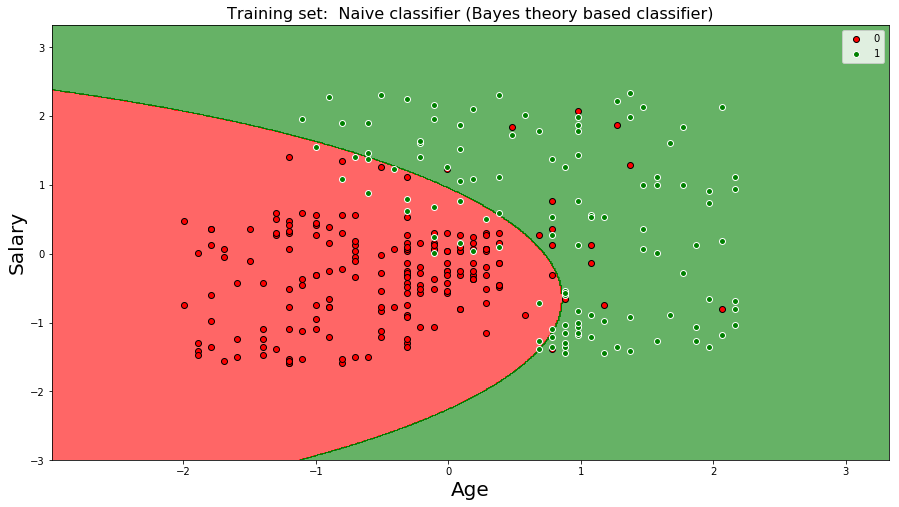

In [39]:
fig1, ax1 = plt.subplots(figsize = (15,8))

# The contourf is for background pixel
# =======================================
ax1.contourf(X1,X2,Z_AS__X1_shape,alpha = 0.60,cmap =  ListedColormap(("red","green")))

# First plot the "red" data points and then proceed for the green data points,, with decent automatic label
# =========================================================================================================
ax1.scatter([i[0] for i in X_set[y_set ==0]], [i[1] for i in X_set[y_set ==0]] , edgecolor='black',facecolor = "red", label = 0 )
ax1.scatter([i[0] for i in X_set[y_set ==1]], [i[1] for i in X_set[y_set ==1]] , facecolor = "green",edgecolor = "white" ,label = 1 )
ax1.set_title("Training set:  Naive classifier (Bayes theory based classifier)", size = 16, color = "black")
ax1.set_xlabel("Age", size = 20)
ax1.set_ylabel("Salary", size = 20)
ax1.legend()


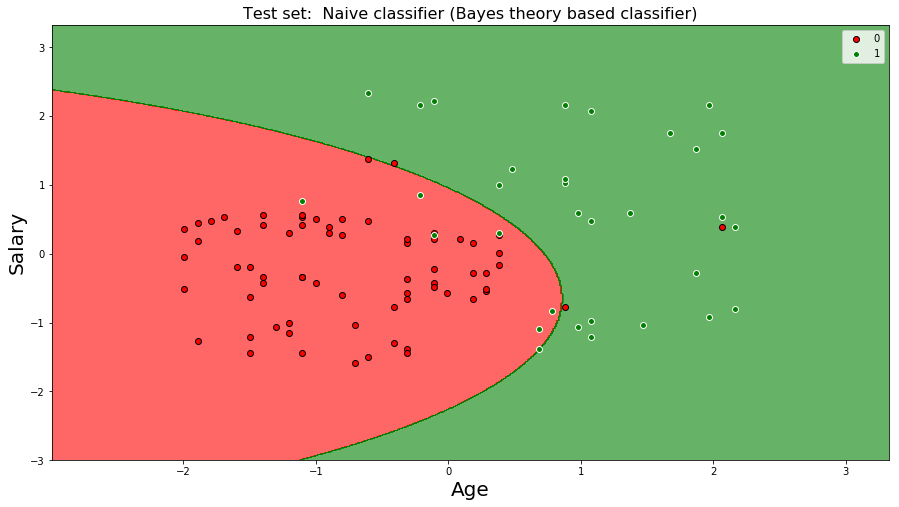

In [42]:
# This code can be use againt anad again, so give a separate name
# ==============================================================
X_set , y_set = X_test, y_test


# Define range baed on X_min, and X_max
# ======================================
x_axis_range = y_axis_range = np.arange(start = X_set.min()-1, stop =   X_set.max()+1, step = 0.01)

# This is so far a like 1-d Numpy array
# =====================================
# print(x_axis_range.shape)
# print(y_axis_range.shape)

# Finally define the mesh.. more detail is giving below this notebook
# ===================================================================
X1,X2 = np.meshgrid(x_axis_range , y_axis_range)


# Here I'm preparing the grid for the model
# ===========================================
X1X2_grid_as___X_train_shape =  np.array([X1.ravel(),X2.ravel()]).T

# Feed the grid_data to the model and get prediction as Z variable
# ================================================================
Z_AS__y_train_shape =    classifier.predict(X1X2_grid_as___X_train_shape)

# For countourf , plot, need to change the shape .... == X1 or X2 or grid data
# ========================================================================
Z_AS__X1_shape = Z_AS__y_train_shape.reshape(X1.shape)
#================================================================================
#================================================================================
#================================================================================
#================================================================================
fig2, ax2 = plt.subplots(figsize = (15,8))

# The contourf is for background pixel
# =======================================
ax2.contourf(X1,X2,Z_AS__X1_shape,alpha = 0.60,cmap =  ListedColormap(("red","green")))

# First plot the "red" data points and then proceed for the green data points,, with decent automatic label
# =========================================================================================================
ax2.scatter([i[0] for i in X_set[y_set ==0]], [i[1] for i in X_set[y_set ==0]] , edgecolor='black',facecolor = "red", label = 0 )
ax2.scatter([i[0] for i in X_set[y_set ==1]], [i[1] for i in X_set[y_set ==1]] , facecolor = "green",edgecolor = "white" ,label = 1 )
ax2.set_title("Test set:  Naive classifier (Bayes theory based classifier)", size = 16, color = "black")
ax2.set_xlabel("Age", size = 20)
ax2.set_ylabel("Salary", size = 20)
ax2.legend()

# Calculate the number of points....

In [41]:
# Looking new observations but the regions will remain the same...
# K-NN is non-linear classifier, 
# useful when data is not linealy separable

[Back to Top](#start)

#### <font color = "navy" >Unpacking and mesh plotting with plotly Review</font> <a id="ref_review"></a>

### List unpacking

In [44]:
lis_1 = [1,2,3,4,5,6]

In [45]:
h1, h2, h3, h4, h5, h6 = lis_1

In [46]:
print(f"| {h1} | {h2} | {h3} | {h4} | {h5} |")

| 1 | 2 | 3 | 4 | 5 |


### Array unpacking unpacking

In [47]:
lis_1 = [1,2,3,4,5,6]
lis_2 = [7,8,9]

In [48]:
arr = [lis_1,lis_2]
arr

[[1, 2, 3, 4, 5, 6], [7, 8, 9]]

In [49]:
e1,e2 = arr

In [50]:
e1

[1, 2, 3, 4, 5, 6]

In [51]:
e2

[7, 8, 9]

### Meshgrid unpacking unpacking

In [52]:
xvalues = [1,2,3,4,5,6]
yvalues = [7,8,9]

In [53]:
np.meshgrid(xvalues,yvalues)

[array([[1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6]]),
 array([[7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9]])]

<code>xvalues</code> will be repeated <code>len(yvalues)</code> times along yaxis,(V.down on computer screen) <br>
and <code>yvalues</code> will be repeated <code>len(xvalues)</code> times along xaxis,(LEFT/RIGHT on computer screen) <br>
This creates 2 arrays <br>


In [54]:
xx,yy = np.meshgrid(xvalues,yvalues)

In [55]:
xx

array([[1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6]])

In [56]:
xx.shape

(3, 6)

In [57]:
yy

array([[7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9]])

In [58]:
yy.shape

(3, 6)

In [59]:
print(f"{yy[0]}")
print(f"{xx[0]}")

[7 7 7 7 7 7]
[1 2 3 4 5 6]
